<a href="https://colab.research.google.com/github/aishwaryaaramanathan/FOML_lab_241501011/blob/main/exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

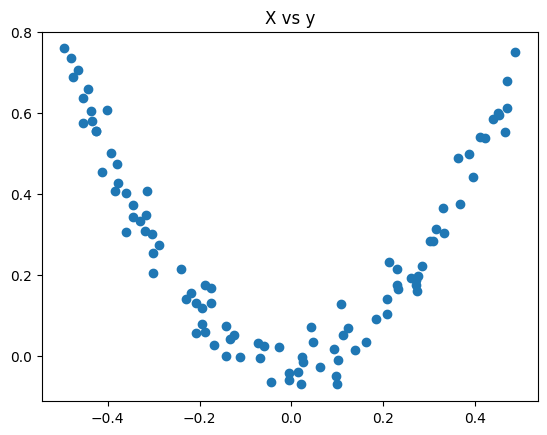

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame({'X': X.reshape(100), 'y': y})

plt.scatter(df['X'], df['y'])
plt.title("X vs y")
plt.show()


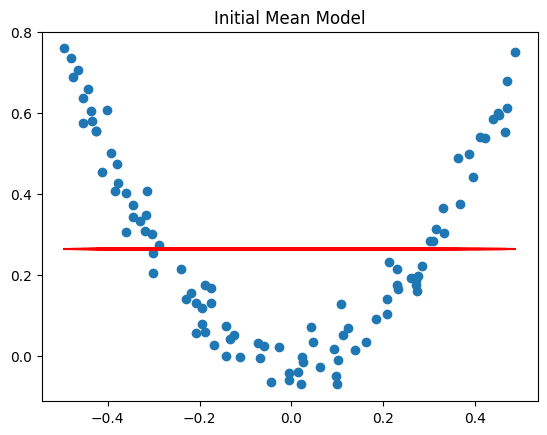

In [3]:
df['pred1'] = df['y'].mean()
df['res1'] = df['y'] - df['pred1']

plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title("Initial Mean Model")
plt.show()


In [4]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(-1, 1), df['res1'].values)

df['pred2'] = df['pred1'] + tree1.predict(df['X'].values.reshape(-1,1))
df['res2'] = df['y'] - df['pred2']


In [7]:
def gradient_boost(X, y, number, lr, count=1, regs=None, foo=None):
    if regs is None:
        regs = []

    # stop condition
    if number == 0:
        return

    # use past residual
    if count > 1:
        y = y - regs[-1].predict(X)
    else:
        foo = y.copy()

    # fit tree
    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)
    regs.append(tree_reg)

    # prediction line
    x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
    y_pred = sum(lr * reg.predict(x1) for reg in regs)

    print("Tree:", count)
    plt.figure()
    plt.plot(x1[:, 0], y_pred, linewidth=2, label="Boosted Model")
    plt.scatter(X[:, 0], foo, color="r", s=15, label="True y")
    plt.legend()
    plt.show()

    # recurse
    gradient_boost(X, y, number - 1, lr, count + 1, regs, foo)


Tree: 1


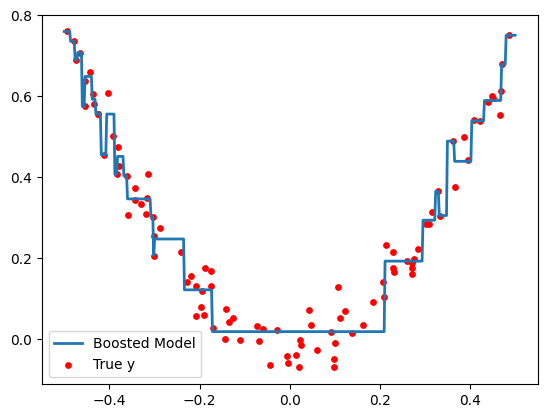

Tree: 2


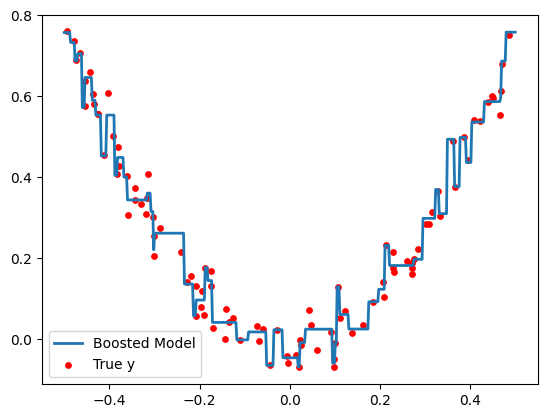

Tree: 3


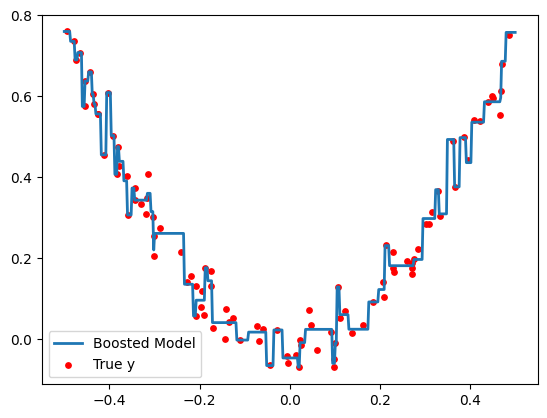

Tree: 4


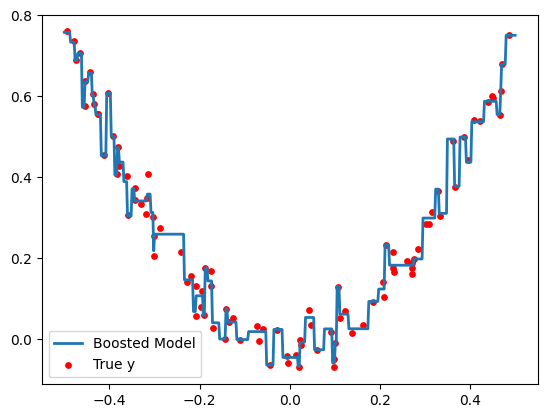

Tree: 5


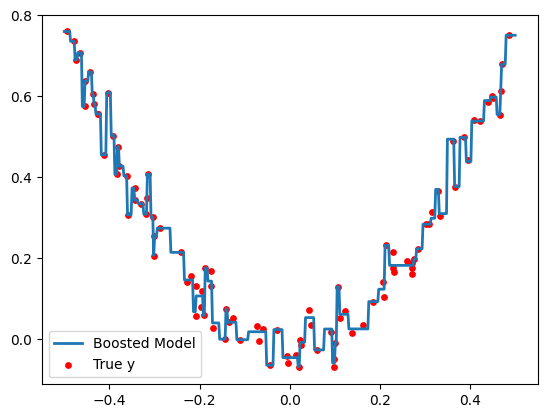

In [8]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)

gradient_boost(X, y, 5, lr=1)